# Generalities about OGC Geospatial extensions for SQL #

**Contents provided by F. Lovergine**

*Structured Query Language (SQL)* is a family of languages implemented since 1974 by IBM and many others to implement the so called _relational model_ for structured data.
In brief, a relational data model is a representation of the abstract application domain _data model_ in terms of multiple tables (rows) of attributes (columns) and relationships (i.e. linking attributes) amont them. Such a kind of tables can be familiar for most of you as a _dataframe_ in the *pandas* package for Python or the R language.

SQL implemnted multiple sub-languages to create, register, update and query a system of tables based on the so-called _relational algebra_ as directly inspired to the  mathematical _theory of sets_ where any type of operation can be expressed in terms of unions, intersections, differences, includes, negations and a few other simple operators.

Originally defined in pure _declarative_ terms, today the current SQL standard also includes procedural, types, and control flow.
The current ANSI/ISO standard is generally extended by implementations.

An example of an SQL query on a table (courtesy of Wikipedia):

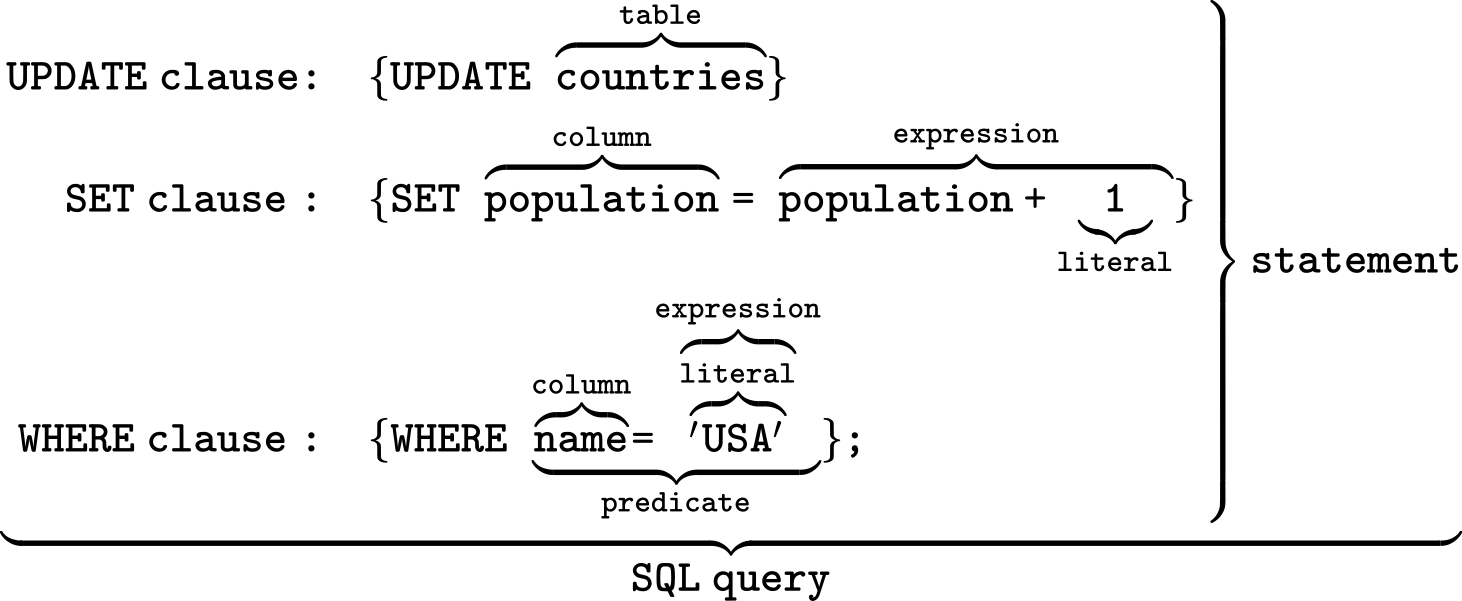

In [1]:
from IPython.display import Image
Image("../images/sql.png", width=800, height=600)

The _Open Geospatial Consortium (OGC)_  has promoted 1994 a standard for geospatial queries, that is currently implemented by most of the relational databases.

See [OGC Standards](https://www.ogc.org/standards/) for complete information.

A non exhaustive list of real-world databases (DBMS) with geospatial extensions includes:

- Postgres/**PostGIS**
- MySQL/Mariadb
- Oracle
- Ingres
- MS/SQL
- Sybase
- Sqlite/**Spatialite**/Geopackage

The bold ones are those typically used in the FOSS world. 
_Note that `geopackage` is roughly an exchange format, not a complete Spatial SQL implementation_.

Those DBMS could include or not even a support for datacubes and rasters, but the OGC Simple Feature Access standard only deals with _vector data_. Often in the real world, DBMS are only used for rasters metadata, while the images/maps are maintained in an specialized object storage.

## Spatialite, a portable relational geodatabase ##

* A single file and single library solution
* Multi-threaded
* OGC compliant 
* Fast and compact, no server required
* Very scalable even for tons of GBs of data
* Based on SQLite engine

The [Spatialte documentation](https://www.gaia-gis.it/gaia-sins/spatialite-sql-5.1.0.html) include a complete reference of its SQL geospatial dialect, while [SQLite documentation](https://www.sqlite.org/docs.html) gives all details about the generalites of the core relational database.

OSGeoLive already includes Spatialite, for other Debian derived distributions you can install as follows:

```
sudo apt install libsqlite3-mod-spatialite spatialite-bin spatialite-gui
```
You can verify to have the required software installed as follows:


In [2]:
!ogrinfo --formats | grep -i spatialite

  SQLite -vector- (rw+v): SQLite / Spatialite


In [3]:
!gdalinfo --formats | grep -i rasterlite

  Rasterlite -raster- (rwvs): Rasterlite


A spatialite package for Python can also be installed (use an environment):

In [4]:
!pip3 install spatialite

You can verify that it is working with:

In [5]:
import spatialite as sp

In [6]:
with sp.connect('new.db') as db:
    print(db.execute('SELECT spatialite_version()').fetchone()[0])

5.0.1


In [7]:
!spatialite new.db '.tables'

SpatiaLite version ..: 5.0.1	Supported Extensions:
	- 'VirtualShape'	[direct Shapefile access]
	- 'VirtualDbf'		[direct DBF access]
	- 'VirtualText'		[direct CSV/TXT access]
	- 'VirtualGeoJSON'		[direct GeoJSON access]
	- 'VirtualXL'		[direct XLS access]
	- 'VirtualNetwork'	[Dijkstra shortest path - obsolete]
	- 'RTree'		[Spatial Index - R*Tree]
	- 'MbrCache'		[Spatial Index - MBR cache]
	- 'VirtualFDO'		[FDO-OGR interoperability]
	- 'VirtualBBox'		[BoundingBox tables]
	- 'VirtualSpatialIndex'	[R*Tree metahandler]
	- 'VirtualElementary'	[ElemGeoms metahandler]
	- 'VirtualRouting'	[Dijkstra shortest path - advanced]
	- 'VirtualKNN'	[K-Nearest Neighbors metahandler]
	- 'VirtualGPKG'	[OGC GeoPackage interoperability]
	- 'VirtualXPath'	[XML Path Language - XPath]
	- 'SpatiaLite'		[Spatial SQL - OGC]
PROJ version ........: Rel. 9.1.1, December 1st, 2022
GEOS version ........: 3.11.1-CAPI-1.17.1
RTTOPO version ......: 1.1.0
TARGET CPU ..........: x86_64-linux-gnu
ElementaryGeometries        

**Fun fuct**

Don't make typos in `connect()`, else you will create a new empty _Spatialite_ database instead of getting your data :-)
Note that spatialite package is a simple wrapper for the main `sqlite3` package that simply load an extension after opening the _SQLite_ database. So, find the full documentation for the package functions reference there.

**Hands on** 

Take your time to become confident with `spatialite` and `spatialite-gui` commands which are the main administrative tools for your data. Have a look to their man pages, help and command line options.

**Hint**

Some key aspects of Sqlite/Spatialite are concerning concurrent accesses, transactions and cache, all aspects governed by so 
called _pragma directives_ which are essential for advanced uses (e.g. big data, multi-threading, performance tuning).

---





**Spatialite and Geopackage files are flavors of the same basic engine (but SL is the most complete as a geo database)**

In [9]:
! file tree_height/geodata_vector/eu_x_y_height_select.gpkg

tree_height/geodata_vector/eu_x_y_height_select.gpkg: SQLite 3.x database (OGC GeoPackage file), user version 10200, last written using SQLite version 3021000, file counter 2635192, database pages 34553, cookie 0xf2, schema 4, UTF-8, version-valid-for 2635192


In [10]:
! file new.db

new.db: SQLite 3.x database, last written using SQLite version 3037002, file counter 1, database pages 1698, cookie 0x118, schema 4, UTF-8, version-valid-for 1


Let's see a simple importing of data into Spatialite

In [11]:
! ogrinfo -so -al tree_height/geodata_vector/eu_x_y_height_select.gpkg

INFO: Open of `tree_height/geodata_vector/eu_x_y_height_select.gpkg'
      using driver `GPKG' successful.

Layer name: New Layer
Geometry: Point
Feature Count: 1267239
Extent: (6.050001, 47.976346) - (9.950000, 49.950000)
Layer SRS WKT:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree"

In [13]:
! ogrinfo -al tree_height/geodata_vector/eu_x_y_height_select.gpkg -where 'fid<=5'

INFO: Open of `tree_height/geodata_vector/eu_x_y_height_select.gpkg'
      using driver `GPKG' successful.

Layer name: New Layer
Geometry: Point
Feature Count: 5
Extent: (6.050001, 47.976346) - (9.950000, 49.950000)
Layer SRS WKT:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.017

In [14]:
! time ogr2ogr -f 'ESRI Shapefile' /tmp/eu_x_y_height_select  tree_height/geodata_vector/eu_x_y_height_select.gpkg


real	0m48.982s
user	0m23.634s
sys	0m11.009s


In [15]:
! spatialite -silent /tmp/eu_x_y_height_select.splite '.loadshp "/tmp/eu_x_y_height_select/New\ Layer" heights utf8'

the SPATIAL_REF_SYS table already contains some row(s)
Loading shapefile at '/tmp/eu_x_y_height_select/New Layer' into SQLite table 'heights'

BEGIN;
CREATE TABLE "heights" (
"pk_uid" INTEGER PRIMARY KEY AUTOINCREMENT,
"id" INTEGER,
"height" DOUBLE);
SELECT AddGeometryColumn('heights', 'geometry', -1, 'POINT', 'XY');
COMMIT;

Inserted 1267239 rows into 'heights' from SHAPEFILE


In [17]:
! spatialite -silent /tmp/eu_x_y_height_select.splite "select avg(height),min(height),max(height),sqrt(avg(height*height)-avg(height)*avg(height)) from heights"

49.3651054490831|47.976346|49.95|0.468988390097542


_Note that function set for Spatialite/SQLite is somehow simplified, sometimes other useful functions could be provided as an add-on extension_

**Hint**

In order to perform write (i.e. create/delete/drop/insert/update ops) operations it is generally required to establish a _transaction_ in order to maximize performances. This is specifically useful when performing operations programmatically (outside of the CLI tool).

That allows both:

* locking the database for access
* doing all-in-one bufferized operations

Note that default transactions are DEFERRED, so they start at first database access. At logical level, a transaction ensures that the whole set of operations performed can be considered as _atomic_ (i.e. performed/discarded all together).

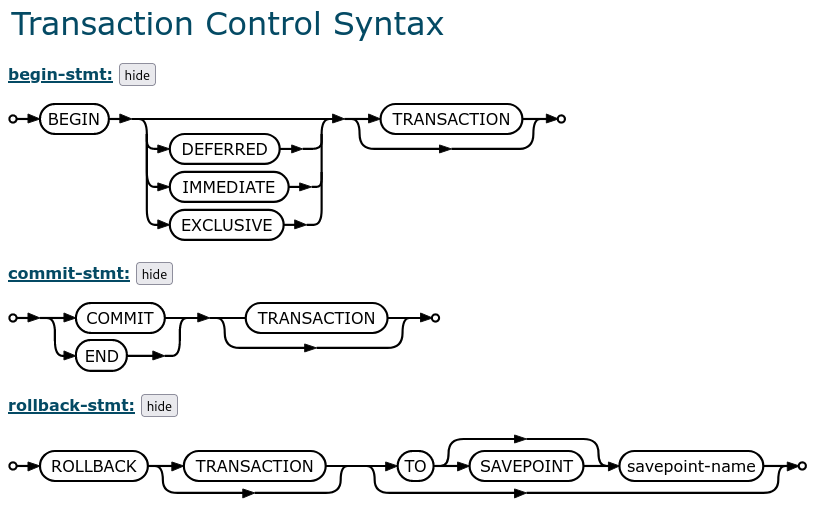

In [18]:
from IPython.display import Image
Image("../images/transaction.png" , width = 800, height = 800)

Let's see some easy operations with SQLite/Spatialite drivers for OGR and the `tree_height` dataset.

First of all, create a copy with an explicit suffix for CSV file which can be managed by OGR tools:

In [19]:
!cp tree_height/txt/eu_y_x_select_6algorithms_fullTable.txt tree_height/txt/eu_y_x_select_6algorithms_fullTable.csv

In [20]:
!ogrinfo -al -so tree_height/txt/eu_y_x_select_6algorithms_fullTable.csv

INFO: Open of `tree_height/txt/eu_y_x_select_6algorithms_fullTable.csv'
      using driver `CSV' successful.

Layer name: eu_y_x_select_6algorithms_fullTable
Geometry: None
Feature Count: 1267239
Layer SRS WKT:
(unknown)
ID: String (0.0)
X: String (0.0)
Y: String (0.0)
a1_95: String (0.0)
a2_95: String (0.0)
a3_95: String (0.0)
a4_95: String (0.0)
a5_95: String (0.0)
a6_95: String (0.0)
min_rh_95: String (0.0)
max_rh_95: String (0.0)
BEAM: String (0.0)
digital_elev: String (0.0)
elev_low: String (0.0)
qc_a1: String (0.0)
qc_a2: String (0.0)
qc_a3: String (0.0)
qc_a4: String (0.0)
qc_a5: String (0.0)
qc_a6: String (0.0)
se_a1: String (0.0)
se_a2: String (0.0)
se_a3: String (0.0)
se_a4: String (0.0)
se_a5: String (0.0)
se_a6: String (0.0)
deg_fg: String (0.0)
solar_ele: String (0.0)


In [21]:
! time ogr2ogr -f SQLite -dsco SPATIALITE=YES -lco LAUNDER=YES -oo X_POSSIBLE_NAMES=X -oo Y_POSSIBLE_NAMES=Y "tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite" "tree_height/txt/eu_y_x_select_6algorithms_fullTable.csv"


real	1m31.803s
user	1m6.724s
sys	0m7.813s


Now, the original CSV file has been ingested as a Spatialite database and many operations can be performed efficiently on both attributes and geometries.

In [22]:
!ogrinfo -al -so "tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite"

INFO: Open of `tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite'
      using driver `SQLite' successful.

Layer name: eu_y_x_select_6algorithms_fulltable
Geometry: Point
Feature Count: 1267239
Extent: (6.050001, 47.976346) - (9.950000, 49.950000)
Layer SRS WKT:
(unknown)
FID Column = ogc_fid
Geometry Column = GEOMETRY
id: String (0.0)
x: Real (0.0)
y: Real (0.0)
a1_95: String (0.0)
a2_95: String (0.0)
a3_95: String (0.0)
a4_95: String (0.0)
a5_95: String (0.0)
a6_95: String (0.0)
min_rh_95: String (0.0)
max_rh_95: String (0.0)
beam: String (0.0)
digital_elev: String (0.0)
elev_low: String (0.0)
qc_a1: String (0.0)
qc_a2: String (0.0)
qc_a3: String (0.0)
qc_a4: String (0.0)
qc_a5: String (0.0)
qc_a6: String (0.0)
se_a1: String (0.0)
se_a2: String (0.0)
se_a3: String (0.0)
se_a4: String (0.0)
se_a5: String (0.0)
se_a6: String (0.0)
deg_fg: String (0.0)
solar_ele: String (0.0)


In [23]:
!ogrinfo -al "tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite" -where 'CastToInteger(id) <= 5'

INFO: Open of `tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite'
      using driver `SQLite' successful.

Layer name: eu_y_x_select_6algorithms_fulltable
Geometry: Point
Feature Count: 5
Extent: (6.050001, 47.976346) - (9.950000, 49.950000)
Layer SRS WKT:
(unknown)
FID Column = ogc_fid
Geometry Column = GEOMETRY
id: String (0.0)
x: Real (0.0)
y: Real (0.0)
a1_95: String (0.0)
a2_95: String (0.0)
a3_95: String (0.0)
a4_95: String (0.0)
a5_95: String (0.0)
a6_95: String (0.0)
min_rh_95: String (0.0)
max_rh_95: String (0.0)
beam: String (0.0)
digital_elev: String (0.0)
elev_low: String (0.0)
qc_a1: String (0.0)
qc_a2: String (0.0)
qc_a3: String (0.0)
qc_a4: String (0.0)
qc_a5: String (0.0)
qc_a6: String (0.0)
se_a1: String (0.0)
se_a2: String (0.0)
se_a3: String (0.0)
se_a4: String (0.0)
se_a5: String (0.0)
se_a6: String (0.0)
deg_fg: String (0.0)
solar_ele: String (0.0)
OGRFeature(eu_y_x_select_6algorithms_fulltable):1
  id (String) = 1
  x (Real) = 6.050001
  y (Real) = 49.727

In [25]:
!ogrinfo -al "tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite" -where 'ogc_fid <= 5'

INFO: Open of `tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite'
      using driver `SQLite' successful.

Layer name: eu_y_x_select_6algorithms_fulltable
Geometry: Point
Feature Count: 5
Extent: (6.050001, 47.976346) - (9.950000, 49.950000)
Layer SRS WKT:
(unknown)
FID Column = ogc_fid
Geometry Column = GEOMETRY
id: String (0.0)
x: Real (0.0)
y: Real (0.0)
a1_95: String (0.0)
a2_95: String (0.0)
a3_95: String (0.0)
a4_95: String (0.0)
a5_95: String (0.0)
a6_95: String (0.0)
min_rh_95: String (0.0)
max_rh_95: String (0.0)
beam: String (0.0)
digital_elev: String (0.0)
elev_low: String (0.0)
qc_a1: String (0.0)
qc_a2: String (0.0)
qc_a3: String (0.0)
qc_a4: String (0.0)
qc_a5: String (0.0)
qc_a6: String (0.0)
se_a1: String (0.0)
se_a2: String (0.0)
se_a3: String (0.0)
se_a4: String (0.0)
se_a5: String (0.0)
se_a6: String (0.0)
deg_fg: String (0.0)
solar_ele: String (0.0)
OGRFeature(eu_y_x_select_6algorithms_fulltable):1
  id (String) = 1
  x (Real) = 6.050001
  y (Real) = 49.727

Using a geospatial database it is possibile to perform easily geoprocessing operations on both attributes and geometries, for instance:

In [26]:
# A simple average on one of the fields for all rows, note that in most of the case, casting is automagically done...
!ogrinfo "tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite" -dialect SQLite -sql 'select avg(qc_a1) from eu_y_x_select_6algorithms_fullTable'

INFO: Open of `tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite'
      using driver `SQLite' successful.

Layer name: SELECT
Geometry: None
Feature Count: 1
Layer SRS WKT:
(unknown)
avg(qc_a1): Real (0.0)
OGRFeature(SELECT):0
  avg(qc_a1) (Real) = 0.802981915802781



In [27]:
# Extract information about the first 5 features
!ogrinfo -al "tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite" -where 'CastToInteger(id) <= 5'

INFO: Open of `tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite'
      using driver `SQLite' successful.

Layer name: eu_y_x_select_6algorithms_fulltable
Geometry: Point
Feature Count: 5
Extent: (6.050001, 47.976346) - (9.950000, 49.950000)
Layer SRS WKT:
(unknown)
FID Column = ogc_fid
Geometry Column = GEOMETRY
id: String (0.0)
x: Real (0.0)
y: Real (0.0)
a1_95: String (0.0)
a2_95: String (0.0)
a3_95: String (0.0)
a4_95: String (0.0)
a5_95: String (0.0)
a6_95: String (0.0)
min_rh_95: String (0.0)
max_rh_95: String (0.0)
beam: String (0.0)
digital_elev: String (0.0)
elev_low: String (0.0)
qc_a1: String (0.0)
qc_a2: String (0.0)
qc_a3: String (0.0)
qc_a4: String (0.0)
qc_a5: String (0.0)
qc_a6: String (0.0)
se_a1: String (0.0)
se_a2: String (0.0)
se_a3: String (0.0)
se_a4: String (0.0)
se_a5: String (0.0)
se_a6: String (0.0)
deg_fg: String (0.0)
solar_ele: String (0.0)
OGRFeature(eu_y_x_select_6algorithms_fulltable):1
  id (String) = 1
  x (Real) = 6.050001
  y (Real) = 49.727

In [28]:
# Extract average by selecting only points in a 1 degree buffer around one (X,Y), using WKT. Note that
# buffers are approximated by 30 nodes per default.

!ogrinfo "tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite" -dialect SQLite -sql \
"select count(*),avg(qc_a1) from eu_y_x_select_6algorithms_fullTable where ST_Intersects(geometry,ST_Buffer(ST_GeomFromText('POINT(6.0500102 49.58841)',4326),1,100))"

INFO: Open of `tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite'
      using driver `SQLite' successful.

Layer name: SELECT
Geometry: None
Feature Count: 1
Layer SRS WKT:
(unknown)
count(*): Integer (0.0)
avg(qc_a1): Real (0.0)
OGRFeature(SELECT):0
  count(*) (Integer) = 221745
  avg(qc_a1) (Real) = 0.808672123384969



Of course, the `spatialite` tool can also be used instead of `ogrinfo` to extract information in tabular form.

In [29]:
!spatialite -silent "tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite" \
"select count(*),avg(qc_a1) from eu_y_x_select_6algorithms_fullTable where ST_Intersects(geometry,ST_Buffer(ST_GeomFromText('POINT(6.0500102 49.58841)',4326),1,100))"

221745|0.808672123384969


**Hands on**

Try to compute the average, min and max of every field in the table and for all the points in a buffer of 1.0 degree buffer around the center of the data extension.

_Hint: Try to find Spatialite geo functions to get the bounding box (layer extent) and its centroid, than use them to select the right points. Take your time to take confidence with Spatialite documentation [here](https://www.gaia-gis.it/gaia-sins/spatialite-sql-5.1.0.html). Once found, the query can be derived easily ;-)_

In [45]:
!spatialite -silent "tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite" "select ST_AsText(ST_Centroid(GetLayerExtent('eu_y_x_select_6algorithms_fullTable')));"


POINT(8 48.963173)


In [49]:
!spatialite -silent "tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite" \
"select count(*),avg(qc_a1),min(qc_a1),max(qc_a1) from eu_y_x_select_6algorithms_fullTable where ST_Intersects(geometry,ST_Buffer((ST_Centroid(GetLayerExtent('eu_y_x_select_6algorithms_fullTable'))),1,100));"


436343|0.793962547812157|0|1


## Using Python to work onto the database

The same operations can be conducted using purely Python scripts. So for instance, it is possible to dump database contents.

In [34]:
import spatialite

db = spatialite.connect('tree_height/txt/eu_y_x_select_6algorithms_fullTable.splite')
cur = db.cursor()
res = cur.execute('SELECT * FROM eu_y_x_select_6algorithms_fullTable')
res

In [35]:
res.fetchone()

(1,
 '1',
 6.050001,
 49.727499,
 '3139',
 '3139',
 '3139',
 '3120',
 '3139',
 '3139',
 '3120',
 '3139',
 '5',
 '4.1e+02',
 '383.72153',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0.962',
 '0.984',
 '0.968',
 '0.962',
 '0.989',
 '0.979',
 '0',
 '17.7',
 b'\x00\x01\x00\x00\x00\x00\xb6\x11Ov33\x18@\xb5o\xee\xaf\x1e\xddH@\xb6\x11Ov33\x18@\xb5o\xee\xaf\x1e\xddH@|\x01\x00\x00\x00\xb6\x11Ov33\x18@\xb5o\xee\xaf\x1e\xddH@\xfe')

In [36]:
res = cur.execute('SELECT a1_95,a2_95,a3_95,ST_AsText(geometry),ST_X(geometry),ST_Y(geometry) FROM eu_y_x_select_6algorithms_fullTable')
res.fetchone()

('3139', '3139', '3139', 'POINT(6.050001 49.727499)', 6.050001, 49.727499)

In [37]:
ls = res.fetchall()
ls

[('1022', '2303', '970', 'POINT(6.050002 49.922155)', 6.0500017, 49.922155),
 ('380', '1336', '332', 'POINT(6.050002 48.602377)', 6.0500021, 48.602377),
 ('3153', '3142', '3142', 'POINT(6.050009 48.151979)', 6.0500089, 48.151979),
 ('666', '4221', '651', 'POINT(6.05001 49.58841)', 6.0500102, 49.58841),
 ('787', '1179', '1187', 'POINT(6.050014 48.608456)', 6.0500143, 48.608456),
 ('2952', '2933', '2937', 'POINT(6.050017 48.571401)', 6.0500165, 48.571401),
 ('3303', '3288', '3296', 'POINT(6.050019 49.921613)', 6.0500189, 49.921613),
 ('1637', '1614', '1618', 'POINT(6.05002 48.822645)', 6.0500201, 48.822645),
 ('1415', '1393', '1396', 'POINT(6.050024 49.847522)', 6.0500238, 49.847522),
 ('1194', '1183', '1186', 'POINT(6.050027 49.661237)', 6.0500266, 49.661237),
 ('2762', '2736', '2740', 'POINT(6.050039 47.995344)', 6.0500389, 47.995344),
 ('437', '3082', '1490', 'POINT(6.050041 49.573607)', 6.050041, 49.573607),
 ('2772', '2776', '2780', 'POINT(6.050043 48.144718)', 6.0500429, 48.144718)

Cursors are _not idempotent_. Guess what happens now! Now explain the name ;-)

In [38]:
ls_again = res.fetchall()
ls_again

[]

So what is the correct thing to do now?

In [39]:
res = cur.execute('SELECT * FROM eu_y_x_select_6algorithms_fullTable LIMIT 5')
ls = res.fetchall()
ls

[(1,
  '1',
  6.050001,
  49.727499,
  '3139',
  '3139',
  '3139',
  '3120',
  '3139',
  '3139',
  '3120',
  '3139',
  '5',
  '4.1e+02',
  '383.72153',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '0.962',
  '0.984',
  '0.968',
  '0.962',
  '0.989',
  '0.979',
  '0',
  '17.7',
  b'\x00\x01\x00\x00\x00\x00\xb6\x11Ov33\x18@\xb5o\xee\xaf\x1e\xddH@\xb6\x11Ov33\x18@\xb5o\xee\xaf\x1e\xddH@|\x01\x00\x00\x00\xb6\x11Ov33\x18@\xb5o\xee\xaf\x1e\xddH@\xfe'),
 (2,
  '2',
  6.0500017,
  49.922155,
  '1022',
  '2303',
  '970',
  '872',
  '5596',
  '1524',
  '872',
  '5596',
  '5',
  '2.9e+02',
  '2374.1411',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0.948',
  '0.990',
  '0.960',
  '0.948',
  '0.994',
  '0.980',
  '0',
  '43.7',
  b'\x00\x01\x00\x00\x00\x00E\xfaH\xa533\x18@\xe3k\xcf,\t\xf6H@E\xfaH\xa533\x18@\xe3k\xcf,\t\xf6H@|\x01\x00\x00\x00E\xfaH\xa533\x18@\xe3k\xcf,\t\xf6H@\xfe'),
 (3,
  '3',
  6.0500021,
  48.602377,
  '380',
  '1336',
  '332',
  '362',
  '1336',
  '1340',
  '332',
  '1340',
  '

Something useful is selecting a different _so called_ **row factory** for cursors to get dictionaries instead of lists.

In [40]:
import sqlite3
db.row_factory = sqlite3.Row

In [41]:
res = db.execute('SELECT * from eu_y_x_select_6algorithms_fullTable')
row = res.fetchone()
row

In [42]:
row.keys()

['ogc_fid',
 'id',
 'x',
 'y',
 'a1_95',
 'a2_95',
 'a3_95',
 'a4_95',
 'a5_95',
 'a6_95',
 'min_rh_95',
 'max_rh_95',
 'beam',
 'digital_elev',
 'elev_low',
 'qc_a1',
 'qc_a2',
 'qc_a3',
 'qc_a4',
 'qc_a5',
 'qc_a6',
 'se_a1',
 'se_a2',
 'se_a3',
 'se_a4',
 'se_a5',
 'se_a6',
 'deg_fg',
 'solar_ele',
 'GEOMETRY']

In [43]:
row[0]

1

In [44]:
row['ogc_fid'],row['deg_fg']

(1, '0')

So, a typical code looks like this:

In [ ]:
for row in res.fetchmany(size=5):
    print(row['id'])

## Rasterlite, mixing rasters and databases together

As explained before, it also possibile merging raster dataset within the database, as an alternative to distributing files. The rasterlite engine supports colortable, internal pyramids and tiling, so it is unexpectedly efficient, with a small memory footprint for its operations. First of all, it is required
installing a few stuff.
```
sudo apt install rasterlite2-bin libtiff-tools
```

_Note that a previous version had a completely different toolset and implementation. What follows is about version 2. Version 1 is officially deprecated._

In [50]:
!rl2tool 2>&1 # Do you know stderr vs stdout difference? 

did you forget setting some request MODE ?


usage: rl2tool MODE [ ARGLIST ]
-h or --help                    print this help message
-v or --version                 print version infos

mode: CREATE
will create a new RasterLite2 Raster Coverage
-db or --db-path      pathname  RasterLite2 DB path
-cov or --coverage    string    Coverage's name
-smp or --sample-type keyword   Sample Type keyword (see list)
-pxl or --pixel-type  keyword   Pixel Type keyword (see list)
-bds or --num-bands   integer   Number of Bands
-cpr or --compression keyword   Compression keyword (see list)
-qty or --quality     integer   Compression Quality [0-100]
-tlw or --tile-width  integer   Tile Width [pixels]
-tlh or --tile-height integer   Tile Height [pixels]
-srid or --srid       integer   SRID value
       or
-nosrid or --no-srid
-res or --resolution  number    pixel resolution(X and Y)
-xres or --x-resol    number    pixel resolution(X specific)
-yres or --y-resol    number    pixel resolution(Y specific)


Some general information: a limited number of formats is directly supported, that is (Geo)TIFF, JPG and Grid with an optional world file to describe a geotransform. The coverage is mainly tought as a compact _prêt-à-porter_ distribution with styles included. For instance, a very simple WMS server (`wmslite`) is one of the include tools for visualization from a conventional desktop GIS such as QGIS.

## A simple example with rasterlite2

In [51]:
!gdalinfo -stats geodata/dem/GMTED2010.tif

Driver: GTiff/GeoTIFF
Files: geodata/dem/GMTED2010.tif
       geodata/dem/GMTED2010.tif.aux.xml
Size is 720, 600
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            

Our goal is loading this simple coverage in an ad-hoc Rasterlite database

In [52]:
! rm -f /tmp/dem.sqlite
! rl2tool CREATE -db /tmp/dem.sqlite -cov GMTED2010 -smp INT16 -pxl DATAGRID -cpr LZMA -srid 4326 -res 0.008333333340000 -nd -32768



rl2tool: request is CREATE
              DB path: /tmp/dem.sqlite
             Coverage: GMTED2010
          Sample Type: INT16
           Pixel Type: DATAGRID
      Number of Bands: 1
        NO-DATA pixel: -32768
          Compression: LZMA DeltaFilter (7-zip, lossless)
   Tile size (pixels): 512 x 512
                 Srid: 4326
Pixel base resolution: X=0.00833333334 Y=0.00833333334
======= Coverage Policies =======
Strict Resolution check: Disabled
 Mixed Resolutions mode: Disabled
  Section's Input Paths: Disabled
 Section's MD5 Checksum: Enabled
  Section's XML Summary: Enabled

     SQLite version: 3.37.2
 SpatiaLite version: 5.0.1
RasterLite2 version: 1.1.0-beta1

Raster Coverage "GMTED2010" successfully created

Operation CREATE successfully completed


Now it is possible to load the GeoTIFF file:

In [53]:
! rl2tool IMPORT -db /tmp/dem.sqlite -cov GMTED2010 -srid 4326 -wf -src geodata/dem/GMTED2010.tif -pyr



rl2tool; request is IMPORT
              DB path: /tmp/dem.sqlite
    Input Source path: geodata/dem/GMTED2010.tif
             Coverage: GMTED2010
Using the WorldFile
          Forced SRID: 4326
Immediately building Pyramid Levels

     SQLite version: 3.37.2
 SpatiaLite version: 5.0.1
RasterLite2 version: 1.1.0-beta1

------------------
Importing: geodata/dem/GMTED2010.tif
    Image Size (pixels): 720 x 600
                   SRID: 4326
       LowerLeft Corner: X=29.00 Y=-1.00
      UpperRight Corner: X=35.00 Y=4.00
       Pixel resolution: X=0.00833333334 Y=0.00833333334
>> Image successfully imported in: 0 mins 01 secs
  ----------
    Pyramid levels successfully built for Section 1
>> Total time: 0 mins 01 secs

Operation IMPORT successfully completed


Styling needs to be specified using a SLD (OGC standard, also managed in Qgis).

In [54]:
# spatialite-gui /tmp/dem.splite

In [55]:
! cat etopo1_styles/etopo.xml

<?xml version="1.0" encoding="UTF-8"?>
<RasterSymbolizer version="1.1.0" xsi:schemaLocation="http://www.opengis.net/se http://schemas.opengis.net/se/1.1.0/Symbolizer.xsd" xmlns="http://www.opengis.net/se" xmlns:ogc="http://www.opengis.net/ogc" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
	<Name>etopo</Name>
	<Description>
		<Title>ETOPO1 Color Map</Title>
		<Abstract>derived from the original "etopo2" color rule (GRASS GIS)</Abstract>
	</Description>
	<Opacity>1.0</Opacity>
	<ColorMap>
		<Interpolate fallbackValue="#ffffff">
			<LookupValue>Rasterdata</LookupValue>
			<InterpolationPoint>
				<Data>-11000.00000000</Data>
				<Value>#000000</Value>
			</InterpolationPoint>
			<InterpolationPoint>
				<Data>-5000.00000000</Data>
				<Value>#000064</Value>
			</InterpolationPoint>
			<InterpolationPoint>
				<Data>-1000.00000000</Data>
				<Value>#3232c8</Value>
			</InterpolationPoint>
			<InterpolationPoint>
				<Data>-1.00000000</Dat